In [46]:
import pandas as pd

pd.options.display.max_rows = 50000

# Load data into DataFrame objects (Replace with your data sources)
users = pd.read_csv(r'C:\Users\hamza\OneDrive\Desktop\mahoomy projectwith excel\traveltide extracted db for segmentation\users.csv')
sessions = pd.read_csv(r'C:\Users\hamza\OneDrive\Desktop\mahoomy projectwith excel\traveltide extracted db for segmentation\sessions.csv')
flights = pd.read_csv(r'C:\Users\hamza\OneDrive\Desktop\mahoomy projectwith excel\traveltide extracted db for segmentation\flights.csv')
hotels = pd.read_csv(r'C:\Users\hamza\OneDrive\Desktop\mahoomy projectwith excel\traveltide extracted db for segmentation\hotels.csv')

# Create temporary table user_perks
user_perks = pd.merge(users, sessions, on='user_id', how='left')
user_perks = pd.merge(user_perks, flights, left_on='trip_id', right_on='trip_id', how='left')
user_perks = pd.merge(user_perks, hotels, left_on='trip_id', right_on='trip_id', how='left')

user_perks['free_hotel_meal'] = user_perks['hotel_name'].notnull().astype(int)
user_perks['free_checked_bag'] = (user_perks['checked_bags'] > 0).astype(int)
user_perks['no_cancellation_fees'] = (user_perks['cancellation'] == 'No').astype(int)
user_perks['exclusive_discount'] = ((user_perks['flight_discount_amount'] > 0) | (user_perks['hotel_discount_amount'] > 0)).astype(int)
user_perks['one_night_free_hotel_with_flight'] = ((user_perks['nights'] >= 1) & (user_perks['trip_id'].notnull())).astype(int)

user_perks = user_perks.groupby('user_id').agg({
    'free_hotel_meal': 'max',
    'free_checked_bag': 'max',
    'no_cancellation_fees': 'max',
    'exclusive_discount': 'max',
    'one_night_free_hotel_with_flight': 'max'
}).reset_index()

# Segment customers based on perks
segmented_customers = user_perks.copy()
segmented_customers['segment'] = ''
segmented_customers.loc[segmented_customers['free_hotel_meal'] == 1, 'segment'] = 'Free Hotel Meal'
segmented_customers.loc[segmented_customers['free_checked_bag'] == 1, 'segment'] = 'Free Checked Bag'
segmented_customers.loc[segmented_customers['no_cancellation_fees'] == 1, 'segment'] = 'No Cancellation Fees'
segmented_customers.loc[segmented_customers['exclusive_discount'] == 1, 'segment'] = 'Exclusive Discount'
segmented_customers.loc[segmented_customers['one_night_free_hotel_with_flight'] == 1, 'segment'] = 'One Night Free Hotel with Flight'

final_segmented_customers = segmented_customers[['user_id', 'segment']]

print(final_segmented_customers)


       user_id                           segment
0            0  One Night Free Hotel with Flight
1            1  One Night Free Hotel with Flight
2            2  One Night Free Hotel with Flight
3            3  One Night Free Hotel with Flight
4            4  One Night Free Hotel with Flight
5            5  One Night Free Hotel with Flight
6            6                Exclusive Discount
7            7  One Night Free Hotel with Flight
8            8                Exclusive Discount
9            9  One Night Free Hotel with Flight
10          10  One Night Free Hotel with Flight
11          11  One Night Free Hotel with Flight
12          12                Exclusive Discount
13          13  One Night Free Hotel with Flight
14          14  One Night Free Hotel with Flight
15          15  One Night Free Hotel with Flight
16          16  One Night Free Hotel with Flight
17          17  One Night Free Hotel with Flight
18          18                                  
19          19  One 

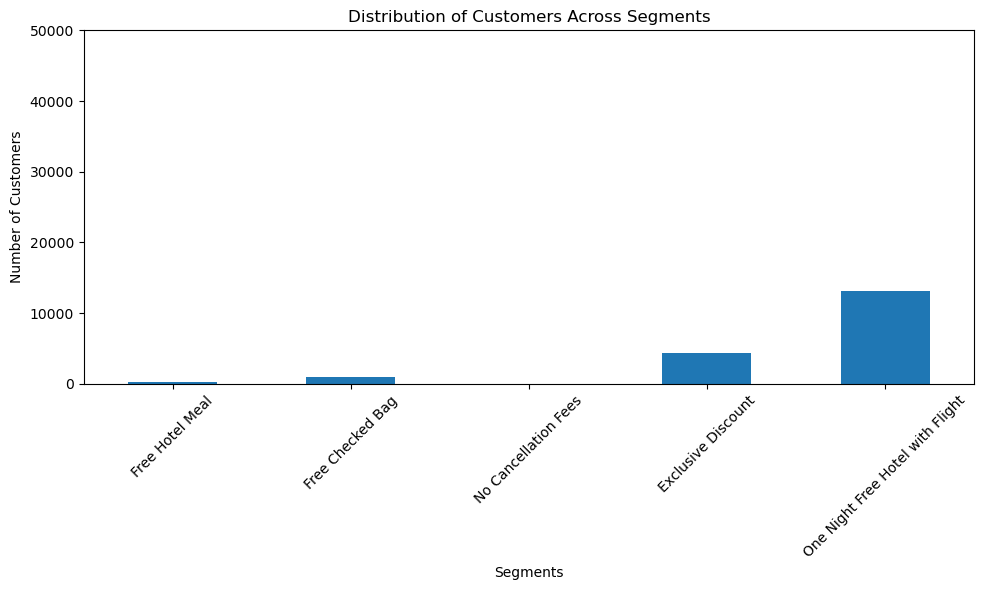

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data into DataFrame objects (Replace with your data sources)
users = pd.read_csv(r'C:\Users\hamza\OneDrive\Desktop\mahoomy projectwith excel\traveltide extracted db for segmentation\users.csv')
sessions = pd.read_csv(r'C:\Users\hamza\OneDrive\Desktop\mahoomy projectwith excel\traveltide extracted db for segmentation\sessions.csv')
flights = pd.read_csv(r'C:\Users\hamza\OneDrive\Desktop\mahoomy projectwith excel\traveltide extracted db for segmentation\flights.csv')
hotels = pd.read_csv(r'C:\Users\hamza\OneDrive\Desktop\mahoomy projectwith excel\traveltide extracted db for segmentation\hotels.csv')


# Create temporary table user_perks
user_perks = pd.merge(users, sessions, on='user_id', how='left')
user_perks = pd.merge(user_perks, flights, left_on='trip_id', right_on='trip_id', how='left')
user_perks = pd.merge(user_perks, hotels, left_on='trip_id', right_on='trip_id', how='left')

user_perks['free_hotel_meal'] = user_perks['hotel_name'].notnull().astype(int)
user_perks['free_checked_bag'] = (user_perks['checked_bags'] > 0).astype(int)
user_perks['no_cancellation_fees'] = (user_perks['cancellation'] == 'No').astype(int)
user_perks['exclusive_discount'] = ((user_perks['flight_discount_amount'] > 0) | (user_perks['hotel_discount_amount'] > 0)).astype(int)
user_perks['one_night_free_hotel_with_flight'] = ((user_perks['nights'] >= 1) & (user_perks['trip_id'].notnull())).astype(int)

user_perks = user_perks.groupby('user_id').agg({
    'free_hotel_meal': 'max',
    'free_checked_bag': 'max',
    'no_cancellation_fees': 'max',
    'exclusive_discount': 'max',
    'one_night_free_hotel_with_flight': 'max'
}).reset_index()

# Segment customers based on perks
segmented_customers = user_perks.copy()
segmented_customers['segment'] = ''
segmented_customers.loc[segmented_customers['free_hotel_meal'] == 1, 'segment'] = 'Free Hotel Meal'
segmented_customers.loc[segmented_customers['free_checked_bag'] == 1, 'segment'] = 'Free Checked Bag'
segmented_customers.loc[segmented_customers['no_cancellation_fees'] == 1, 'segment'] = 'No Cancellation Fees'
segmented_customers.loc[segmented_customers['exclusive_discount'] == 1, 'segment'] = 'Exclusive Discount'
segmented_customers.loc[segmented_customers['one_night_free_hotel_with_flight'] == 1, 'segment'] = 'One Night Free Hotel with Flight'

final_segmented_customers = segmented_customers[['user_id', 'segment']]

# Count the number of customers in each segment, including those with zero counts
segment_counts = final_segmented_customers['segment'].value_counts().reindex(['Free Hotel Meal', 'Free Checked Bag', 'No Cancellation Fees', 'Exclusive Discount', 'One Night Free Hotel with Flight'])

# Create a bar plot
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar')
plt.title('Distribution of Customers Across Segments')
plt.xlabel('Segments')
plt.ylabel('Number of Customers')
plt.ylim(0, 50000)  # Set the y-axis limits to stop at 50,000
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()
